# Mínimos y máximos de funciones escalares

In [1]:
import time
print(' Última ejecución  ', time.asctime() )

 Última ejecución   Tue Mar  7 10:46:10 2023


## Objectivos


Recordar el concepto de mínimo y máximo de una función real y cómo se calculan.

Introducir el desarrollo de Taylor de 2º orden de funciones escalares y la matriz hessiana.

* Comentar la condición suficiente.

Relación entre los mínimos y máximos y los autovalores de la matriz hessiana.
    
* Ejemplos de cálculos de mínimos y máximos.

Introducir el concepto de mínimos condicionados.

* Presentar el método de los multiplicadores de Lagrange.


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

## Desarrollo de Taylor de 2º orden de funciones escalares.

### Revisión de los conceptos de extremos, mínimos y máximos.

Para las funciones reales, $f(x)$, habíamos definido como mínimo local, aquel valor $x_0$ del dominio tal que en los valores en un intervalo en torno suyo, de anchura $h$, la función es mayor o igual que en $x_0$. De forma similar definimos el máximo local.

Llamamos mínimo local:

$$
x \in [x_0 - h, x_0 + h] \Rightarrow f(x) \ge f(x_0)
$$

Llamamos máximo local:

$$
x \in [x_0 - h, x_0 + h] \Rightarrow f(x) \le f(x_0)
$$

$x_0$ es un mínimo global si todos el valor de la función en todos los puntos del dominio es mayor que en $x_0$, y de forma similar para el máximo.


*Ejemplo*: La siguiente función real, $f(x) = x^2+2x-1$, presenta un mínimo local en el $x_0 = -1$. 

¿Recuerdas cómo calculábamos los mínimos o máximos? Ambos cumplían la condición de que su pendiente era nula y el signo de segunda derivada nos indicaba, si era positiva que era un mínimo, y si era negativa, que era un máximo.

Condición de extremos: $f'(x_0) = 0$

Codición de máximo: $f''(x_0) < 0$ y de mínimo $f''(x_0) >0$


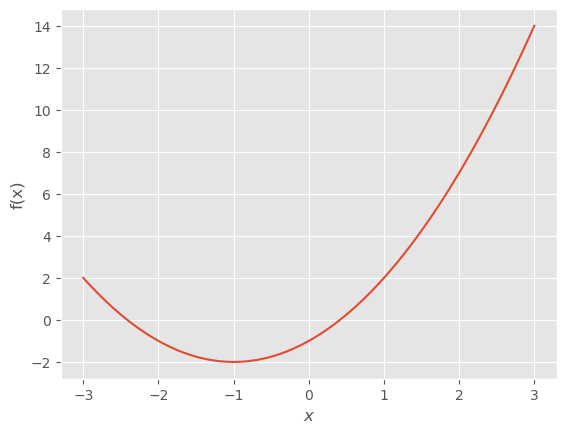

In [3]:
fun = lambda x: x**2 + 2*x - 1
gf.fun1d(fun);

En este caso, con $f(x) = x^2 + 2x - 1$, la condición de extremo: $f'(x_0) = 2 x_0 + 2 = 0$, que resulta en $x_0 = -1$.

Se trata de un mínimo, ya que $f''(x_0) = 2$

Si recuerdas, podíamos obtener los mínimos y máximos, gracias a que esta función es diferenciable, admite desarrollo de Taylor de segundo orden. 

El desarrollo de Taylor de segundo orden de una función real, $f(x)$, es:

$$
f(x_0 + h) \simeq f(x_0) + f'(x_0) h + \frac{1}{2} f''(x_0) h^2
$$

donde $h$ es un tamaño "pequeño".

Recuerda también que la condición suficiente para que una función real tenga desarrollo de Taylor de segundo orden en un valor $x_0$ es que su derivada segunda en un entorno de ese valor sea continua.

Interpretando $f'(x_0)$ como la pendiente, vemos que para que la función no cambie de valor entorno a $x_0$, su pendiente tiene que ser nula.

Y después, el segundo sumando, $\frac{1}{2} f''(x_0) h^2$, es positivo o negativo dependiendo del signo de la derivada segunda, $f''(x_0)$. De ahí la condición de mínimo o máximo.

### Igualdad de las derivadas segundas cruzadas

Antes de abordar el desarrollo de Taylor de segundo orden de funciones escalares, vamos a ver este teorema importante:

*Teorema*: Sea $f({\bf x})$ una función escalar de $\mathrm{R}^n \to \mathrm{R}$, si las derivadas segundas son continuas en una bola centrada en un punto, ${\bf x}_0$, se cumple que las derivadas cruzadas son iguales:

$$
\frac{\partial^2 f({\bf x}_0)}{\partial x_i \partial x_j} = \frac{\partial^2 f({\bf x}_0)}{\partial x_j \partial x_i}
$$ 
con $i \ne j, \; i = 1, \dots, n; \, j = 1, \dots, n$.


## Desarrollo de Taylor de segundo orden de funciones escalares

Sea una función escalar, $f({\bf x})$, de $\mathrm{R}^n \to \mathrm{R}$, con derivadas segundas continuas en un punto interior, ${\bf x}_0$, del dominio, la función se puede aproximar en un punto "próximo", ${\bf x}$, separado de ${\bf x}_0$ por un vector "pequeño" ${\bf v}$, por su **desarrollo de Taylor de segundo orden**:

$$
f({\bf x}_0 + {\bf v}) \simeq f({\bf x}_0) + \sum_{i=1}^n \frac{\partial f({\bf x}_0)}{\partial x_i} v_i + \frac{1}{2}\sum_{i= 1}^n  \sum_{j=1}^n \frac{\partial^2 f({\bf x}_0)}{ \partial x_i \partial x_j} v_i v_j
$$



Que podemos reescribir en forma matricial:


$$
f({\bf x}_0 + {\bf v}) \simeq f({\bf x}_0) + \nabla f({\bf x}_0) \, {\bf v} + \frac{1}{2} {\bf v}^T \, {\bf H}({\bf x}_0) \, {\bf v}
$$

donde ${\bf H}({\bf x}_0)$ es la **matriz hessiana** valorada en ${\bf x}_0$, cuyas componentes son las derivadas segundas,

$$
{\bf H}_{ij}({\bf x}_0) = \frac{\partial^2 f({\bf x}_0)}{ \partial x_i \partial x_j}
$$

y donde ${\bf v}$, es el vector en forma columna, y ${\bf v}^T$ en forma fila.




*Cuestión*: ¿Es la hessiana una matriz simétrica?

*Cuestión*: Se escapa del alcance de este curso, pero inténtalo, ¿cómo crees que sería el desarrollo de Taylor de segundo orden de una función vectorial?

*Date cuenta*: Al menos hay una función vectorial de la que conoces su desarrollo de Taylor de 2º orden. ¡La de la trayectoria de un movil a lo largo del tiempo!

$$
{\bf r}(t_0 + \Delta t) \simeq {\bf r}(t_0) + {\bf r}'(t_0) \Delta t + \frac{1}{2} {\bf r}''(t_0) (\Delta t)^2
$$

**Ejemplo**: Calcula el desarrollo de Taylor de la función escalar, $f(x, y) = 2x^2 + 4 y^2$, en el punto $(0, 0)$.

Los distintos sumandos del desarrollo de Taylor son:

$$
f({\bf x}_0) = 0
$$

El gradiente es

$$
\nabla f ({\bf x}) = (4 x , 8 y)  
$$

Valorado en el origen es:

$$
\nabla f ({\bf x}_0) = (0, 0) 
$$

La matriz hessiana es:

$$
{\bf H}({\bf x}) = \left( \begin{array}{cc} 4 & 0 \\ 0 & 8\end{array} \right)
$$

que es independiente del punto, ${\bf x}$.

Luego el desarrollo de Taylor respecto al punto ${\bf x}_0$ es:

$$
f({\bf x}_0 + {\bf v}) = \frac{1}{2} (v_x, v_y) \, \left( \begin{array}{cc} 4 & 0 \\ 0 & 8\end{array} \right) \, \left( \begin{array}{c} v_x \\ v_y \end{array} \right) =  2 v^2_x + 4 v^2_y 
$$




Observa la gráfica de la función y sus conjuntos de nivel.

*Cuestión*: ¿Puedes determinar si hay un mínimo o un máximo local y dónde?

Es obvio, ¿verdad?

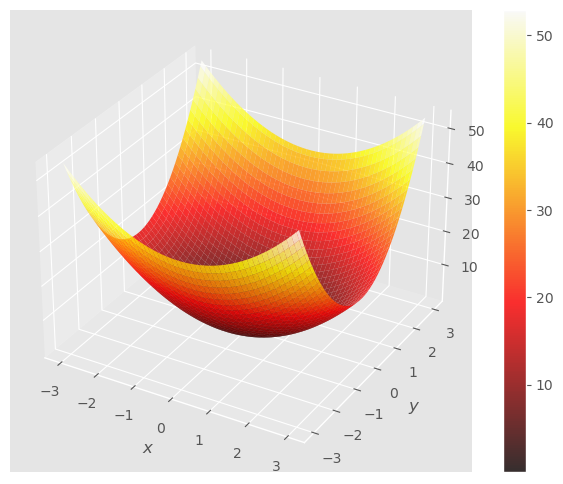

In [4]:
fun = lambda x, y : 2*x*x + 4*y*y
gf.graph(fun);

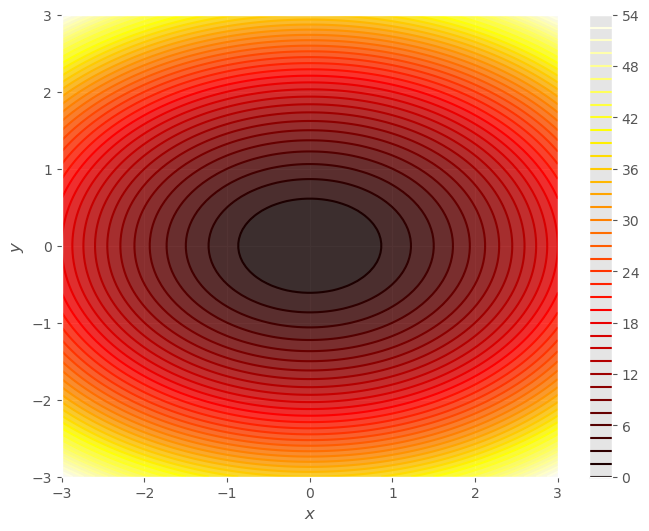

In [5]:
gf.contour(fun, contours = 40);

## Mínimos y máximos de funciones escalares


Como en una dimensión, llamaremos un punto **extremo** o **crítico**, ${\bf x}_0$, de una función escalar diferenciable, $f({\bf x})$, de $\mathrm{R}^n \to \mathrm{R}$, a aquellos puntos del dominio cuyo gradiente sea nulo, $\nabla f ({\bf x}_0) = {\bf 0}$.

En el ejemplo anterior, la función escalar, $f(x, y) = 2x^2 + 4y^2$ tiene un extremo en $(0, 0)$.

Observa la gráfica y los conjuntos de nivel de la siguiente función, $f(x, y) = 2x^2 - 4y^2$. Puedes comprobar que el punto $(0, 0)$ es un extremo, tiene gradiente nulo (el gradiente es $\nabla f(x, y) = (4x, -8 y)$ ), sin embargo no es ni máximo ni mínimo, es un **punto silla**. Definimos como tal, al punto extremo a partir del que la función asciende en una dirección y desciende en otra.

*Explora* y modifica el vector ${\bf v}$ sobreimpuesto sobre los conjuntos de nivel y observa como dependiendo de la dirección de ${\bf v}$ la función finalmente asciende o desciende.

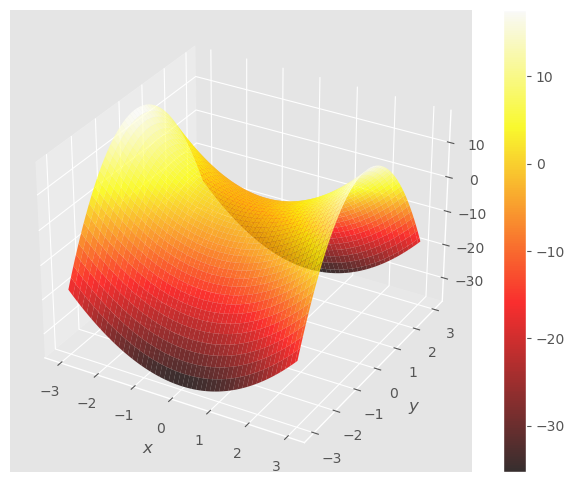

In [6]:
fun = lambda x, y: 2*x*x - 4*y*y 
gf.graph(fun);

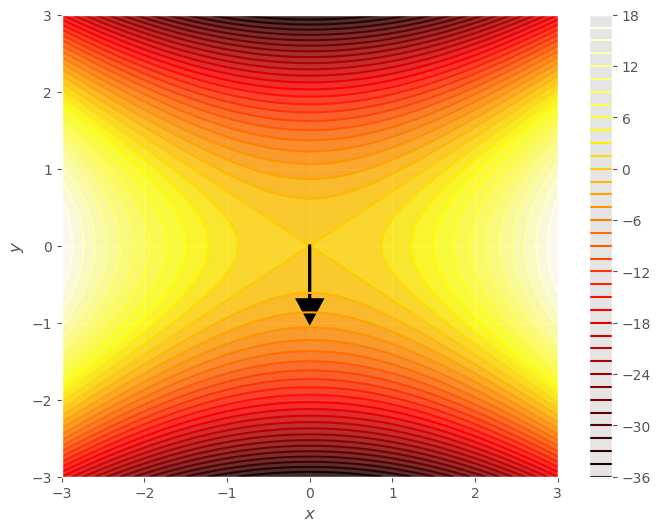

In [7]:
x0, y0 =  0., 0.
vx, vy =  0., -1.
gf.contour(fun, contours = 40);
gf.arrow(x0, y0, vx, vy);

*Ejercicio*: Da el desarrolo de Taylor de segundo orden de la función $f(x, y) = 2 x^2 - 4 y^2$ en el punto silla $(0, 0)$.

La función en ${\bf x}_0$, vale:

$$
f({\bf x}_0) = 0
$$

El gradiente es nulo:

$$
\nabla f(x, y) = (4 x, -8y) \Rightarrow \nabla f({\bf x}_0) = (0, 0)
$$

La matriz hessiana es:

$$
{\bf H}({\bf x}) = \left( \begin{array}{cc} 4 & 0 \\ 0 & -8\end{array} \right)
$$

que es independiente del punto, ${\bf x}$.

Luego el desarrollo de Taylor respecto al punto ${\bf x}_0$ es:

$$
f({\bf x}_0 + {\bf v}) =  \frac{1}{2} (v_x, v_y) \, \left( \begin{array}{cc} 4 & 0 \\ 0 & - 8\end{array} \right) \, \left( \begin{array}{c} v_x \\ v_y \end{array} \right) =  2 v^2_x - 4 v^2_y 
$$

Donde vemos que si avanzamos *solo* en la dirección $x$ la función asciende, mientras que si avanzamos *solo* en la dirección $y$, desciende. Se trata pues de un punto silla.

### Clasificación de puntos extremos

Los puntos extremos de una función escalar, serán máximos, mínimos o puntos silla, dependiendo de valor del término de la matriz hessiana de su desarrollo de Taylor:

$$
\frac{1}{2} {\bf v}^T \, {\bf H}({\bf x}_0) \, {\bf v}
$$

Si para todo vector ${\bf v}$ el término es positivo, entonces es un mínimo, la función asciende siempre.
Si es negativo, es un máximo, la función desciende siempre. Y si dependiendo del vector, es positivo o negativo, es un punto silla, la función en una dirección asciende y en otra desciende.

Consideremos el caso de una función escalar $f(x, y)$ de $\mathrm{R}^2 \to \mathrm{R}$, en el que la matriz Hessiana es diagonal, y los elementos de la diagonal son $\lambda_1, \lambda_2$ en un punto extremo ${\bf x_0}$.

El término del Hessiano en el desarrollo de Taylor sería:

$$
\frac{1}{2} (v_x, v_y) \, \left( \begin{array}{cc} \lambda_1 & 0 \\ 0 & \lambda_2\end{array} \right) \, \left( \begin{array}{c} v_x \\ v_y \end{array} \right) = \frac{1}{2}\left( \lambda_1 v^2_x + \lambda_2 v^2_y \right)
$$

Podemos ver que si los dos valores son positivos, $\lambda_1 > 0, \lambda_2 >0$, el punto será un mínimo, para cualquier vector $(v_x, v_y)$ la función asciende.

Si los dos son negativos, $\lambda_1 < 0, \lambda_2 < 0$, es un máximo, la función desciende siempre.

Si uno es negativo y otro positivo, dependera del vector, $(v_x, v_y)$, en determinadas direcciones la función asciende y otras denciende, luego será un punto silla.

*Ejercicio*: Calcula la matriz hessiana para el punto extremo $(0, 0)$ de la función, $f(x, y) = 3 x^2 + 3y^2 - 2xy$.

*Observa* la gráfica de esta función y sus conjuntos de nivel.

El gradiente es:
    
$$
\nabla f(x, y) = (6 x - 2y, 6y - 2x)
$$

Y la matriz Hessiana:

$$
{\bf H}(x, y) = \left( \begin{array}{cc} 6 & -2 \\ -2 & 6\end{array}\right)
$$

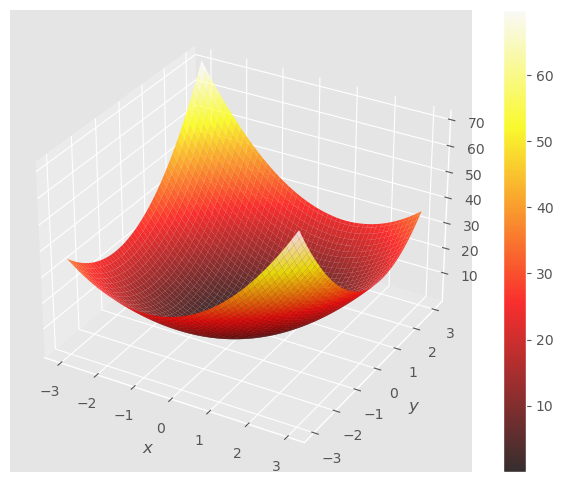

In [8]:
fun = lambda x, y: 3*x*x + 3*y*y -2*x*y
gf.graph(fun);

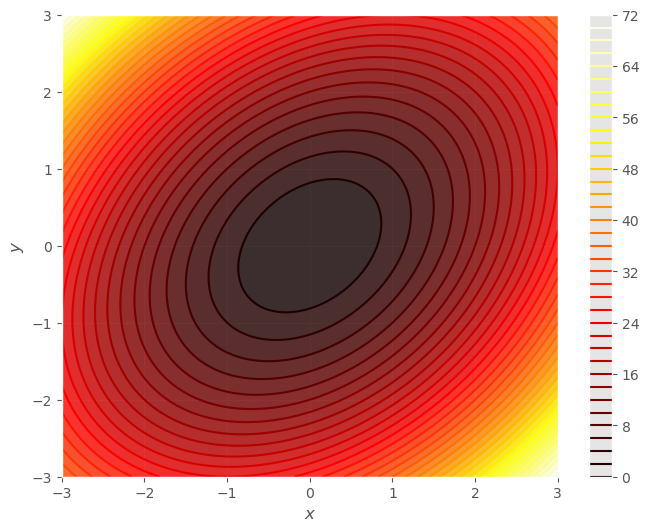

In [9]:
gf.contour(fun, contours=40);

¿Y si la hesiana en el punto extremo, ${\bf x}_0$, no es diagonal?

Sabemos que la matriz hessiana, al ser las derivadas segundas continuas, es simétrica, y también sabemos que las matrices simétricas son diagonalizables.

Por lo tanto, existe una base ortonormal, $\{{\bf e}'_1, {\bf e}'_2 \}$, en la que la matriz hessiana es diagonal, ${\bf H}'({\bf x}_0)$ con auto-valores $\lambda'_1, \lambda'_2$. La relación entre las dos viene dada por la matriz ortonormal de cambio de base ${\bf U}$.

$$
{\bf H}({\bf x}_0) = {\bf U} \, {\bf H}' ({\bf x}_0) \, {\bf U}^T
$$
donde:

$$
{\bf U} { \bf U}^T = {\bf U}^T { \bf U}  = {\bf I}
$$



El vector ${\bf v}$ lo podemos expresar en la base de los autovectores (lo denotamos como ${\bf v}'$), mediante el cambio:

$$
{\bf v} = {\bf U} \, {\bf v}'
$$

Podemos entonces reescribir el término de la hessiana del desarrollo de Taylor en la base de los autovectores:

$$
\frac{1}{2}{\bf v}^T \, {\bf H}({\bf x}_0) \, {\bf v} = \frac{1}{2}{\bf v}'^T {\bf U}^T \, {\bf U} {\bf H}'({\bf x_0}){\bf U}^T \, {\bf U} {\bf v}'= \frac{1}{2} {\bf v}'^T \, {\bf H}'({\bf x_0}) \,{\bf v}'
$$



Esto es, el término de la hessiana del desarrollo de Taylor no depende de la base en la que lo calculemos.

Si expresamos el vector, $(v_x, v_y)$, en la base de los autovectores, esto es, $(v'_x, v'_y)$, tenemos

$$
\frac{1}{2} {\bf v'}^T \, {\bf H}'({\bf x}_0) \, {\bf v}' =   \frac{1}{2} (v'_x, v'_y) \, \left( \begin{array}{cc} \lambda'_1 & 0 \\ 0 & \lambda'_2\end{array} \right) \, \left( \begin{array}{c} v'_x \\ v'_y \end{array} \right) = 
\frac{1}{2} \left( \lambda'_1 v'^2_x + \lambda'_2 v'^2_y \right)
$$

Y por lo tanto, si los dos autovalores de la Hessiana son positivos, $\lambda'_1 > 0, \lambda'_2 >0$, el punto extremo ${\bf x}_0$ es mínimo; si los dos son negativos $\lambda'_1 <0, \lambda'_2 <0$, es un máximo, y si uno es positivo y otro negativo, es un punto silla.


En el ejemplo anterior, la Hessiana era:

$$
{\bf H}(x, y) = \left( \begin{array}{cc} 6 & -2 \\ -2 & 6\end{array}\right)
$$

Calculamos sus autovalores:

$$
\left| \begin{array}{cc} (6-\lambda) & -2 \\ -2 & (6-\lambda) \end{array}\right| = (6-\lambda)^2 -4 = 0
$$

Esto es:

$$
(6-\lambda) = \pm 2 \; \Rightarrow \, \lambda = 6 \pm 2 \; \Rightarrow \, \lambda'_1 = 4, \; \lambda'_2 = 8
$$

El punto extremo es mínimo porque los dos autovalores son positivos.


Calculemos sus autovectores ${\bf e}'_1 = (u_x, u_y), \; {\bf e}'_2 = (v_x, v_y)$, que recordemos deben ser ortonormales:

$$
 \left( \begin{array}{cc} 6 & -2 \\ -2 & 6\end{array}\right) \, \left( \begin{array}{c} u_x \\ u_y \end{array}\right) = 4 \left( \begin{array}{c} u_x \\ u_y \end{array} \right)
$$

Esto es:

$$
6 u_x - 2 u_y =  4 u_x \; \Rightarrow 2u_x =  2u_y \; \Rightarrow u_x = u_y \
$$

Dado que el vector tiene norma unidad:

$$
{\bf e}'_1 = \left( \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right)
$$

Mientras que para el segundo autovector:

$$
 \left( \begin{array}{cc} 6 & -2 \\ -2 & 6\end{array}\right) \, \left( \begin{array}{c} v_x \\ v_y \end{array}\right) = 8 \left( \begin{array}{c} v_x \\ v_y \end{array} \right)
$$

Esto es:

$$
6 v_x - 2 v_y =  8 v_x \; \Rightarrow  -2 v_x =  2 v_y \; \Rightarrow \, v_x = - v_y
$$

Como tienen que ser ortonormales:

$$
{\bf e}'_2 = \left( -\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right)
$$


En la siguiente celda dibujamos los conjuntos de nivel de la función y sobre el punto extremo dibujamos los autovectores.

*Cuestión*: ¿Puedes dar la relación que guardan los autovectores, los autovalores y los conjuntos de nivel del desarrollo de Taylor en torno a un extremo?

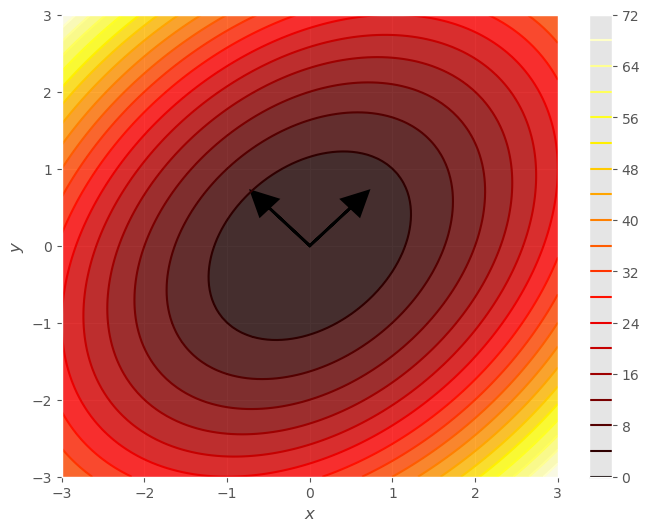

In [10]:
x0, y0 =              0.,            0.
ux, uy =  1./np.sqrt(2.), 1./np.sqrt(2.)
vx, vy = -1./np.sqrt(2.), 1./np.sqrt(2.)
gf.contour(fun, contours = 20)
gf.arrow(x0, y0, ux, uy)
gf.arrow(x0, y0, vx, vy);

El desarrollo de Taylor de segundo orden en torno a un punto extremo *siempre* tiene ejes de simetría, que vienen dados por los autovectores.

La ecuación de los conjuntos de nivel de valor $c$ en el desarrollo de Taylor de segundo orden en un punto extremo, $(x'_0, y'_0)$, en la base de autovectores, viene dada por:

$$
f(x'_0 + v'_x, \, y'_0 + v'_y) \simeq f(x'_0, y'_0) + \frac{1}{2}\left( \lambda'_1 v'^2_x + \lambda'_2 v'^2_y \right) = c
$$


Los conjuntos de nivel son *elipses* si es un mínimo o un máximo, o *hypérbolas* si es un punto silla, respecto sus ejes de simetría.

Los autovalores nos cuantifican la curvatura en cada uno de los ejes de simetría. La curvatura es más acuciada conforme más grande es el autovalor.

O también podemos asociarlos a los ejes de las elipses de los conjuntos de nivel. El eje de la elipse es mayor para autovalores menores.

### minimos y máximos para funciones escalares de varias dimensiones

Sea la función escalar, $f({\bf x})$, de $\mathrm{R}^n \to \mathrm{R}$, un punto ${\bf x}_0$ es **extremo** o **crítico** si su gradiente es nulo, $\nabla f ({\bf x}_0) = {\bf 0}$.

Decimos que un punto extremo es **mínimo local** si todos los puntos dentro de una bola de tamaño $\delta$, centrada en ${\bf x}_0$ tienen un valor de la función menor o igual al de ${\bf x}_0$

$$
{\bf x} \; \mathrm{t.q.} \, \parallel {\bf x} - {\bf x}_0 \parallel  \lt \delta \, \Rightarrow f({\bf x}) \ge f({\bf x}_0)
$$

Y de forma similar, será un **máximo local** si:

$$
{\bf x} \; \mathrm{t.q.} \, \parallel {\bf x} - {\bf x}_0 \parallel \lt \delta \, \Rightarrow f({\bf x}) \le f({\bf x}_0)
$$

Finalmente, es **punto silla** si en toda bola centrada en ${\bf x}_0$, hay puntos dentro de la bola cuyo valor de la función es mayor y otros menor que el valor en el punto crítico.

El punto extremo es un mínimo, si todos los **autovalores**, $\{\lambda_i, \, i=1, \dots, n \}$, de su **matriz hessiana**, ${\bf H}({\bf x_0})$, son positivos; es un máximo si todos son negativos; y es un punto silla si alguno es negativo y alguno positivo.


*Cuestión*: Considera una función escalar $f(x, y)$ y el punto extremo, $(x_0, y_0)$, el determinante de la matriz hessiana es negativo. ¿Puedes clasificar el extremo, es mínimo, máximo, punto silla? ¿Y si el determinante es positivo?

## Mínimos y máximos condicionados

Considera el caso de que queremos calcular los extremos de una función escalar, $f({\bf x})$, pero no en todo su dominio, si no en una parte del mismo. En este caso hablamos de **extremos condicionados**.

Por ejemplo, sea la función: $f(x, y) = x^2 - y^2$, y queremos calcular sus extremos en la circunferencia de radio unidad, esto es, en los puntos que cumplen $x^2 + y^2 = 1$.

La siguiente celda te dibuja los conjuntos de nivel de la función y la circunferencia. Como puedes ver hemos parametrizado la circunferencia en función de $t$ que toma los valores en $[0, 2 \pi)$.

*Cuestión*: ¿Puedes identificar los puntos extremos de la función a lo largo de la circunferencia? 

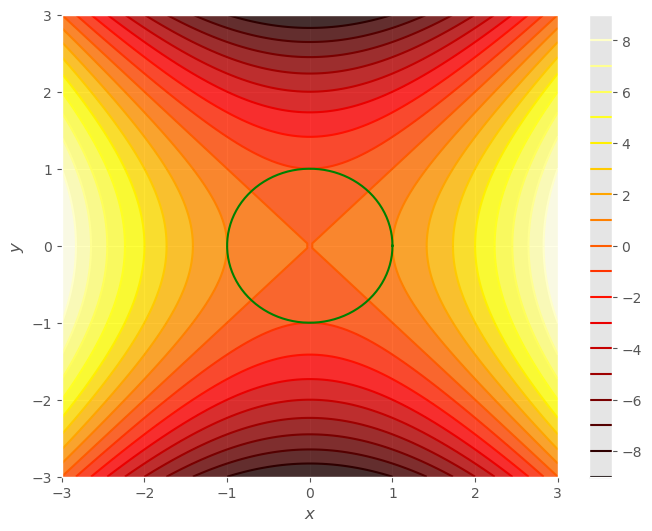

In [25]:
f   = lambda x, y : x*x - y*y
xt  = lambda t    : np.cos(t)
yt  = lambda t    : np.sin(t)
gf.contour(f);
gf.line2d(xt, yt, trange=(0., 2*np.pi, 100), color = 'green',newfig = False);

Vamos a dibujar sobre un determinado punto el gradiente de la función, que como sabemos nos indica la dirección en la que la función experimenta el cambio máximo.

$$
f(x, y) = x^2 - y^2 \, \Rightarrow \nabla f(x, y) = (2x, 2y)
$$

*Considera* primero el valor $t = 3 \pi/4$, que nos da el punto $\left( -1/\sqrt{2}, 1/\sqrt{2} \right)$.

Si quisieramos dirigirnos en una dirección en la que la función aumentase sin salir de la circunferencia, solo podríamos movernos hacia la izquierda, (como si el gradiente tirase de un movil que solo pudiera desplazarse a lo largo de la circunferencia), pero ¿hasta cuándo?

*Considera* ahora el valor $t  = \pi$, esto es el punto $(-1, 0)$. El gradiente ahí es radial, si queremos permanecer en la circunferencia, entonces ya no hay ninguna dirección que nos permita hacerlo y que a su vez nos permita aumentar el valor de la función. Hemos alcazado el máximo condicionado de la función.

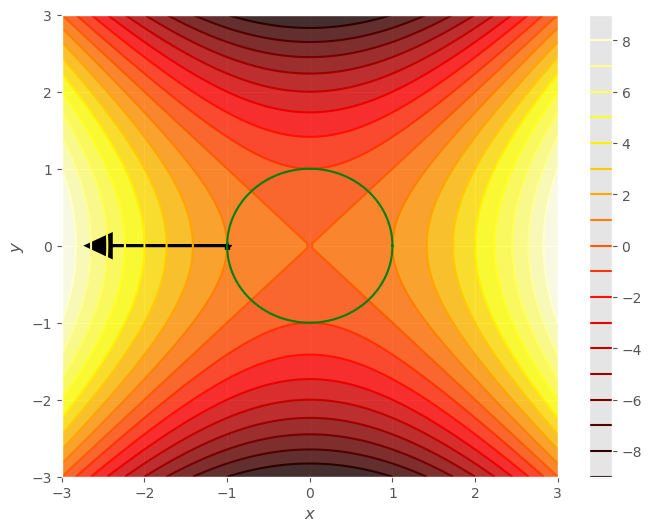

In [30]:
t0  = 4.*np.pi/4
fpx = lambda x, y :  2*x
fpy = lambda x, y : -2*y
x0, y0 = xt(t0), yt(t0)
gf.contour(f);
gf.dot(x0, y0)
gf.line2d(xt, yt, trange=(0., 2*np.pi, 100), color = 'green',newfig = False);
gf.arrow(x0, y0, fpx(x0, y0), fpy(x0, y0), color = 'black'); # nabla f

Si te das cuenta el extremo de la función coincide en el punto cuyo gradiente sea *ortogonal* a la circunferencia.

La circunferencia podemos darla como el conjunto de nivel de una función, (con $c= 1$), simplemente:

$$
g(x, y) = x^2 + y^2 = c
$$

y sabemos que el gradiente de esta función siempre sera *ortogonal* al conjunto de nivel.

Luego el punto extremo, $(x_0, y_0)$ los dos gradientes, el de la función y el de la condición de conjunto de nivel, deben ser paralelos, esto es proporcionales:

$$
\nabla f (x_0, y_0) = \lambda \nabla g(x_0, y_0)
$$

donde $\lambda$ es un valor de proporcionalidad.



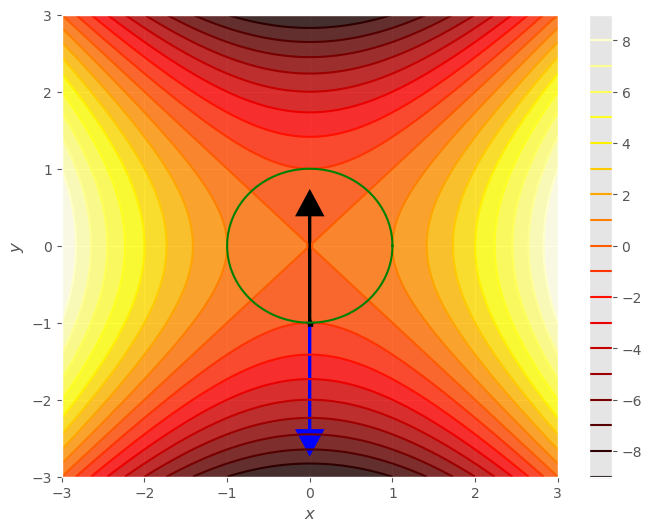

In [36]:
t0  = 6.*np.pi/4.
x0, y0 = xt(t0), yt(t0)
g   = lambda x, y : x*x + y*y
gpx = lambda x, y : 2*x
gpy = lambda x, y : 2*y
gf.contour(f);
gf.dot(x0, y0)
gf.line2d(xt, yt, trange=(0., 2*np.pi, 100), color = 'green',newfig = False);
gf.arrow(x0, y0, fpx(x0, y0), fpy(x0, y0), color = 'black'); # nabla f3
gf.arrow(x0, y0, gpx(x0, y0), gpy(x0, y0), color = 'blue'); # nabla g

### Multiplicadores de Lagrange

Sea una función escalar, $f({\bf x})$, los extremos, ${\bf x_0}$ de esa función, donde ${\bf x}_0$ pertenece a los conjuntos de nivel dados por $g({\bf x}) = c$, cumplen que:

$$
\nabla f ({\bf x}_0) = \lambda \nabla g ({\bf x}_0) 
$$

donde $\lambda$ es un factor de proporcionalidad, llamado **multiplicador de Lagrange**. 


*Ejercicio*: Calcula los extremos condicionados de la función $f(x, y)= x^2 - y^2$ en la circunferencia de radio unidad

$$
\nabla f (x, y) = (2x, -2y)
$$

La condición podemos darla por:

$$
g(x, y) = x^2 + y^2 = 1
$$

La condición de Lagrange:

$$
\nabla f (x_0, y_0) = \lambda \nabla g (x_0, y_0) \; \Rightarrow \, (2x_0, -2y_0) = \lambda (2x_0, 2y_0)
$$

De la primera condición $2 x_0 = \lambda 2 x_0$, obtenemos $\lambda = 1$; pero para que se cumpla la segunda ecuación $-2 y_0 = \lambda 2 y_0$, como $\lambda = 1$, entonces $y_0 = 0$.

Solo hay dos puntos en la circunferencia con $y_0 = 0$ que son $(-1, 0)$ y $(1, 0)$. En ambos se cumple la condición de Lagrange. Son por lo tanto extremos condicionados. 

De la segunda condición $2 y_0 = - \lambda 2 y_0$, obtenemos $\lambda = -1$; pero para que se cumpla en este caso la primera, $2 x_0 = 2 \lambda x_0$, como $\lambda = -1$, entonces $x_0 = 0$. 

Solo hay dos puntos en la circunferencia con $x_0 = 0$ que son: $(0, 1)$ y $(0, -1)$. Son también extremos condicionados

La función en $(-1, 0)$ y $(1, 0)$ vale $1$. Mientras que en $(0, 1)$ y $(0, -1)$ vale $-1$. Los dos primeros son máximos condicionados y los dos últimos mínimos condicionados.

*Verifica*: que es correcto en la celda anterior, colocando $t = 0, \pi/2, \pi, 3 \pi/2$, y observa como los gradientes se alinean y coinciden con los valores máximos y mínimos que puede tomar la función en la circunferencia.

## ¡Aún hay más!

### Joseph Louis Lagrange

Lagrange fue uno de los grandes matématicos y físicos del siglo XVIII y principios del XIX. Fue un hombre de su tiempo, un italiano del norte que recorrió la Europa de su época, y que fue profesor en la gran escuela "École Polytechnique", recién fundada por Napoleón. Le debemos muchas contribuciones, entre ellas las reformulación de la mecánica Newtoniana. Aquí tienes su entrada en la wikipedia: [J. L. Lagrange](https://en.wikipedia.org/wiki/Joseph-Louis_Lagrange)



### Principio de mínima acción

Los máximos y mínimos juegan un papel fundamental en Física. De hecho, la mecánica clásica (y también la moderna) pueden formularse en función del [principio de mínima acción]( https://en.wikipedia.org/wiki/Principle_of_least_action), que nos dice que la dinámica de un sistema físico está regida por la búsqueda de la acción mínima, que matemáticamente se define como la integral de un término que se denomina, **Lagrangiano**. 

Este principio se enunció por primera vez por el físico francés Maupertius en el siglo XVIII, y en su versión moderna, en el siglo XX por el físico y profesor americano Richard **Feynman**. Aquí tienes un enlace a una de sus famosas [clases](http://www.feynmanlectures.caltech.edu/II_19.html) y su entrada en la wikipedia, [Feynman](https://en.wikipedia.org/wiki/Richard_Feynman)


### El método de mínimos cuadrados

Los mínimos y máximos juegan un papel fundamental también en la estimación de parámetros y observables.

Seguramente has utilizado en técnicas experimental de laboratorio el método de los mínimos cuadrados para hacer el ajuste de unos datos a una línea recta.

Como sabes la Naturaleza tiene un comportamiento probabilístico y nuestras medidas estás sujetas *siempre* a las incertidumbres. 

En el método de mínimos cuadrados, se calcula la distancia (al cuadrado) de los valores medidos frente al valor de una función de hipótesis, por ejemplo la recta, que depende de diversos parámetros, (en el caso de la recta, los parámetros son la pendiente, $a$, y el umbral en el origen, $b$). Estimamos éstos parámetros y sus incertidumbres calculando el mínimo de la suma de las distancias al cuadrado. A esta función la llamamos, $\chi^2$, que en el caso de ajuste a una recta, es una función escalar de dos variables, $a, b$. 

Esto es, determinamos los parámetros de nuestro modelo como aquellos que hacen que la suma las distancias al cuadrado de los datos con respecto al modelo sea la menor posible.

En el caso de la recta:

Sea una muestra de datos $\{(x_i, y_u), \; i = 1, \dots, n\}$, con errores $\sigma_i = \sigma$,
que se distribuyen a lo largo de una recta. Sabemos que ésta tiene dos parámetros, $a$, la pendiente y $b$, el umbral en el origen.

$$
y(x \, | \, a, b) = a \, x + b
$$

y construimos la función escalar $\chi^2(a, b)$ como:

$$
\chi^2(a, b) = \frac{1}{n-2} \, \sum_{i=1}^n \frac{(y_i - y(x_i | a, b))^2}{\sigma^2}  \\ 
= \frac{1}{n-2} \, \sum_{i=1}^n \frac{(y_i - a \, x_i - b)^2}{\sigma^2}
$$

donde el término del denominador, $n-2$, corresponde a los grados de libertad que son el número de datos, $n$, menos el número de parámetros, 2 en este caso (por $a, b$).


Y estimamos los parámetros $\hat{a}, \hat{b}$, como aquellos que minimizan la $\chi^2$

$$
(\hat{a}, \hat{b}) \;\;\; \mathrm{t.q.} \;\; \chi^2(\hat{a}, \hat{b}) = \mathrm{min}(\chi^2(a, b))
$$

Las siguientes celdas muestran el ajuste a una recta de datos simulados.

Generamos primero una muestra de datos aleatorios $\{ (x_i, y_i), \; i= 1, \dots, n \}$, a lo largo de una recta, cada uno con la misma incertidumbre $\sigma_i = \sigma$. Luego estimamos los parámetros, $(\hat{a}, \hat{b})$, mediante el método de mínimos cuadrados. 

En la figura se dibujan los puntos con su error, la recta verdadera y la recta estimada.

*Explora* Cambia el número de puntos, o los parámetros verdaderos para ver cómo cambia el ajuste.

In [37]:
import scipy.stats    as stats
import scipy.optimize as optimize

def experiment(a, b, sigma, npoints, xrange = (0, 10)):
    x0, xf = xrange
    xs = x0 + (xf - x0)*stats.uniform.rvs(size = npoints)
    ys = a * xs + b + stats.norm.rvs(scale = sigma, size = npoints)
    return (xs, ys)

def lsq_fit(xs, ys, sigma, aguess =1, bguess = 0.):
    fres = lambda pars: (ys - pars[0]*xs - pars[1])/sigma
    x, _ = optimize.leastsq(fres, (aguess, bguess))
    return x

def chisq(a, b):
    chi2 = 0.
    for i in range(len(ys)):
        dx = (ys[i] - a*xs[i] -b)/sigma
        chi2 += dx*dx
    return chi2/(len(ys)-2)

a =  1.0401168631872617 b =  -0.2769129667794785


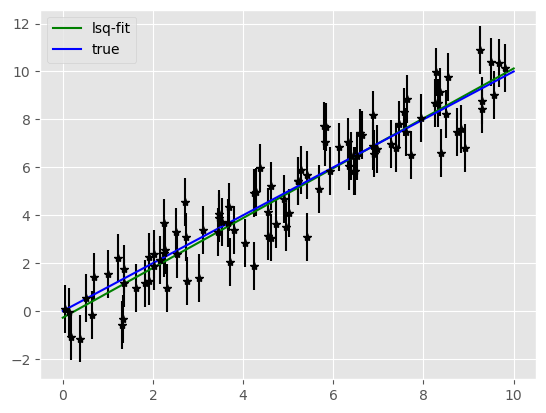

In [43]:
atrue, btrue, sigma, npoints = 1., 0., 1., 100
xrange = (0, 10)
xs, ys     = experiment(atrue, btrue, sigma, npoints, xrange = xrange)
ahat, bhat = lsq_fit(xs, ys, sigma) 
plt.errorbar(xs, ys, yerr=sigma, fmt='*', color = 'black')
ts = np.linspace(*xrange, 100)
plt.plot(ts, bhat  + ahat *ts, color = 'green', label = 'lsq-fit')
plt.plot(ts, btrue + atrue*ts, color = 'blue' , label = 'true')
print('a = ', ahat, 'b = ', bhat)
plt.legend();


En la siguiente celda, dibujamos los conjuntos de nivel de la función $\chi^2(a, b)$.

Puedes ver para este experimento que los valores estimados nos dan el mínimo de $\chi^2$ y puedes ver también los conjuntos de nivel a distinto valores, que al ser próximos al mínimo deben ser elipses, y que nos dan una estimación de la incertidumbre de los parámetros $a$, $b$. El valor verdadero es el punto en negro, mientras que el estimado es el punto en rojo.

chisq  0.9659838681929437


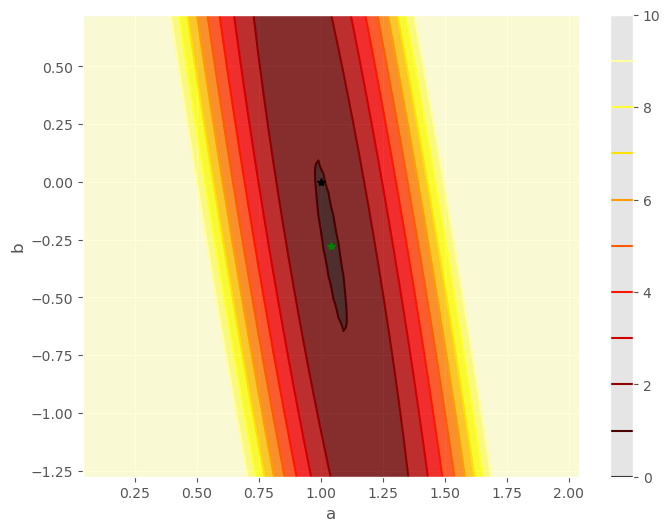

In [44]:
xchi =  chisq(ahat, bhat)
print('chisq ', xchi)
gf.contour(chisq, contours = 10, xrange = (ahat - 1, ahat + 1, 100), zlim = (0, 10),
           yrange = (bhat - 1, bhat +1, 100))
gf.dot(ahat, bhat, color = 'green'); gf.dot(atrue, btrue, color = 'black');
ax = plt.gca(); ax.set_xlabel('a'), ax.set_ylabel('b');

### Las redes neuronales

Las redes neuronales son algoritmos matemáticos que *aprenden* a identificar patrones y clasificar muestras. Hace poco más de una década Google desarrolló una potente red neuronal que distinguía entre imágenes de gatos y perros. Desde entonces, quizás sin que te des cuenta, las redes neuronales están en nuestras vidas.

La redes neuronales toman el nombre de su similitud con nuestro sistema nervioso.
Una red está compuesta de neuronas que se disponen en capas. En la figura de la siguiente celda se muestra un esquema de una red neuronal. Cada neurona tienen un conjunto de entradas y una sola salida. Matemáticamente cada neurona es una función escalar, $\mathrm{R}^n \to \mathrm{R}$, donde $n$ es el número de entradas. La última capa de la red suele ser una sola neurona y su salida es la respuesta de la red. Matemáticamente toda la red es una función escalar $\mathrm{R}^N \to \mathrm{R}$, donde $N$ es el número de entradas en la primera capa.

En estos vídeos puedes encontrar una introducción sencillas a las redes neuronales [[>]](https://www.youtube.com/watch?v=aircAruvnKk) y a sus métodos de entrenamiento [[>]](https://www.youtube.com/watch?v=IHZwWFHWa-w)


**Esquema de una red neuronal**

Las neuronas en la primera capa reciben los datos del mundo "exterior" y la neurona de la última capa da la respuesta de la red.


<img src="./imgs/NN.png" width="400"/>

Las capas intermedias las podemos considerar *ocultas*.


La función escalar de la neurona es habitualmente una sigmoide.

La sigmoide tiene como parámetros un vector de n-dimensiones, ${\bf a}$, y un escalar, $b$.

Su forma es la siguiente:

$$
u( {\bf x} \, | \, {\bf a}, b ) = \frac{1}{1 + e^{-{\bf a x} - b}}
$$

Nota que es una función escalar $\mathrm{R}^n \to \mathrm{R}$ y que su valor está comprendido en el intervalo $[0, 1]$

*Explora:* Modifica el coeficiente $a$ en la siguiente celda y observa cómo cambia el respuesta de la sigmoide.

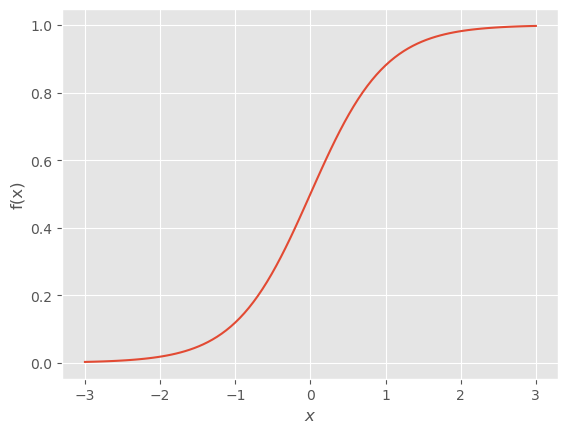

In [45]:
a, b = 2., 0
f = lambda x: 1/(1+np.exp(-a*x - b))
gf.fun1d(f);

**¿Cómo funcionan las redes neuronales?**

Mediante entrenamiento, esto es, minimizando una función escalar que llamamos error.

Consideremos el caso de la red neuronal que distingue imágenes de perros y gatos.

La imagen la podemos matematizar dándola como un conjunto de píxeles (como si la imagen fuera un mosaico y cada tesela un *pixel*), y el valor de cada pixel correspondería por ejemplo a un valor en la escala de grises si la imagen está en blanco y negro. Hemos convertido por lo tanto la imagen en un vector, ${\bf x}$, que será la entrada a nuestra red.

La red tendra varias capas con diversas neuronas, por ejemplo $L$ capas, con $K$ neuronas en cada capa, y acabará con una neurona final. Ésta dará un valor entre $[0, 1]$, el 0 corresponderá a la imagen de un gato y 1 a la del perro.

La red neuronal es pues en sí misma una función escalar que a partir de la imagen inicial ${\bf x}$ nos da una sola respuesta $y({\bf x} | {\bf a}^{lk}, b^{lk})$, donde ${\bf a}^{lk}, b^{lk}$ son los parámetros de la neurona que está la capa $l$ y en la posición $k$ dentro de esa capa. La respuesta de la red neuronal es por lo tanto una función escalar $\mathrm{R}^N \to \mathrm{R}$, siendo $N$ el número de pixels de nuestras imágenes.

Construimos una función error a partir de una muestra de imágenes de perros y gatos $\{ {\bf x}_i, \; i = 1, \dots, M\}$, donde $M$ es un número muy grande, y de la respuesta correcta para cada imagen $\{ y_i, \; i = 1, \dots, M \}$, donde $y_i$ será 0 cuando la imagen sea de un gato y 1 de un perro, con la siguiente expresión:

$$
E({\bf a}^{lk}, b^{lk}) = \frac{1}{M-Q} \, \sum_{i=1}^M (y_i - y({\bf x}_i | {\bf a}^{lk}, b^{lk}))^2
$$

La función error es una función escalar $\mathrm{R}^Q \to R$, donde $Q$ es el número total de parámetros de todas las neuronas.

Date cuenta que en el caso de que la red acertase siempre, la función error valdría 0.

En el método de mínimos cuadrados, estimamos los parámetros, $(\hat{a}, \hat{b})$ minimizando la función $\chi^2(a,b)$, ahora determinaremos los parámetros de la neuronas, minimizando la función error. Esto es, fijaremos los parámetros de las neuronas a aquellos con los que la red se equivoque lo menos posible en la muestra con la que la hemos entrenado.

$$
(\hat{\bf{a}}^{lk}, \hat{b}^{lk}) \;\;\; \mathrm{t.q.} \;\; E(\hat{\bf{a}}^{lk}, \hat{b}^{lk}) = \mathrm{min}(E({\bf a}^{lk}, b^{lk}))
$$

En el ejemplo del ajuste por mínimos cuadrados, la función $\chi^2(a, b)$ dependía de dos parámetros, y podíamos calcularlos analíticamente, pero ahora nuestra función error $E({\bf a}^{lk}, b^{lk})$ tiene $Q$ parámetros, que puede ser un número muy grande.



Sería imposible calcular el mínimo analíticamente, pero los ingeniros, físicos y matemáticos de Google han sido capaces de desarrollar una serie de métodos computacionales muy potentes con los que estimar los parámetros de las neuronas minimizando la función error. ¡Y se basan en calcular **grandientes** y aplicar **la regla de la cadena**!

Aquí hay un vídeo [[>]](https://www.youtube.com/watch?v=IHZwWFHWa-w) que lo explica.

Una vez la red está "entrenada" o "ha aprendido" (esto es, hemos minimizado su función error), le podemos mostrar otras fotos de gatos y perros y para cada una de ellas, predicirá para nuestro asombro si son perros o gatos. Sea ahora una imagen con vector ${\bf x}$, la respuesta de la red vendrá dada por  $y({\bf x} \, | \, \hat{{\bf a}}^{lk}, \hat{b}^{lk})$


**¿Y ésto tiene que ver con la Física?**

¡Mucho! En la actualidad pocos son los análisis en Física de Partículas, por ejemplo, donde no se utilice una red neuronal o un método similar.

Se utilizan para identificar si una partícula es un electrón o un muón (su hermano más pesado). O si en una interacción hay un bosón de Higgs o no. Para decidir si una interacción es relevante o es del montón.

Ya te puedes imaginar que las redes neuronales están detrás de algunas aplicaciones como Facebook, Instagram, Spotify, TikTok y de todos los genios matématicos que online intentan predecir tus gustos.

Si quieres apreder algo más sobre la redes neuronales puedes leer este [libro online](http://neuralnetworksanddeeplearning.com/index.html) y puedes experimental con el modulo [scikit-learn](https://scikit-learn.org/stable/) de Python.

La siguiente imagen muestra las trazas de dos eventos de un detector que busca una nueva desintegración nuclear, que correspondería a la imagen de la izquierda, mientras que la de la derecha muestra un evento típico de contaminación o de fondo. ¿Ves las diferencia entre las dos? ¿Nos sería de ayuda un red neuronal para distinguir los dos tipos de eventos, para separar la señal del fondo?

<img src="./imgs/NEXT_signal_bkg_mc_event.png" width="800"/>


**¡Esto es todo por ahora!**

## Apendices

¡Algo más complicado!

*Ejercicio*: Utiliza Python y las métodos del modulo scipy para calcular los extremos de la función:

$$
f(x, y) = \frac{x - y}{ 2 x^2 + 8 y^2 + 3}
$$
¡Empieza por dibujar la función y sus conjuntos de nivel!

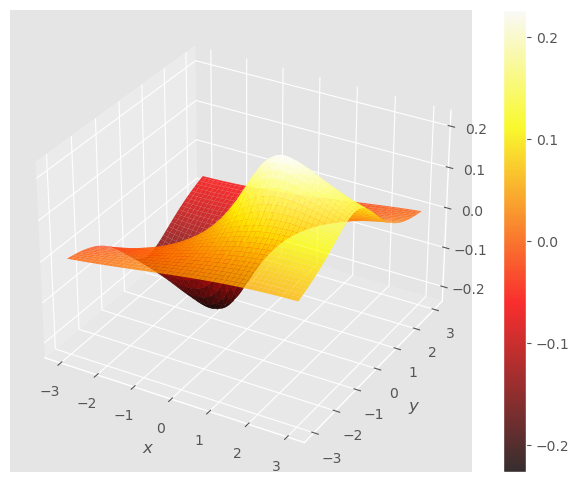

In [18]:
fun = lambda x, y: (x-y)/(2*x*x + 8*y*y +3)
gf.graph(fun);

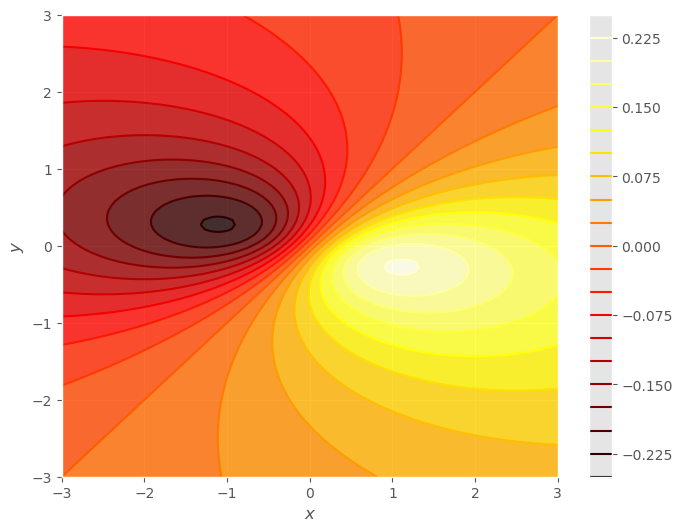

In [19]:
gf.contour(fun);

De los conjuntos de nivel observamos que hay un mínimo en torno al $(-1, 0)$ y un máximo cerca del $(1, 0)$, y que los ejes de simetría en los extremos coinciden con los ejes coordenadas.

En este ejercicio es imposible calcular analíticamente los puntos extremos, y tenemos que utilizar métodos numéricos en Python.

En las siguientes celdas, primero calculamos numéricamente el punto mínimo y máximo.

Luego usaremos cálculo simbólico para calcular las derivadas parciales y segundas, para después evaluar la matriz hessiana en los puntos extremos. 

Finalmente calcularemos numéricamente los autovalores y autovectores de la matriz hessiana, y comprobaremos que se trata de un máximo y un mínimo.

In [20]:
import scipy.optimize as optimize
import scipy.linalg   as linalg
fun = lambda x : (x[0]-x[1])/(2*x[0]*x[0] + 8*x[1]*x[1] + 3)
res1 = optimize.minimize(fun, (-1, 0))
x0, y0 = res1.x
print('punto mínimo ', x0, y0)
fun = lambda x : -(x[0]-x[1])/(2*x[0]*x[0] + 8*x[1]*x[1] + 3)
res2 = optimize.minimize(fun, (1, 0))
x1, y1 = res2.x
print('punto máximo ', x1, y1)

punto mínimo  -1.0954920902489502 0.2738621986560991
punto máximo  1.0954920606202636 -0.27386221675122946


In [21]:
import sympy
x, y = sympy.symbols('x y')
fx = sympy.diff((x-y)/(2*x*x+8*y*y+3), x)
fy = sympy.diff((x-y)/(2*x*x+8*y*y+3), y)
print('fx ', fx)
print('fy ', fy)

fx  -4*x*(x - y)/(2*x**2 + 8*y**2 + 3)**2 + 1/(2*x**2 + 8*y**2 + 3)
fy  -16*y*(x - y)/(2*x**2 + 8*y**2 + 3)**2 - 1/(2*x**2 + 8*y**2 + 3)


In [22]:
fxx = sympy.diff(fx, x)
fxy = sympy.diff(fx, y)
fyy = sympy.diff(fy, y)
fyx = sympy.diff(fy, x)
print('fxx ', fxx)
print('fxy ', fxy)
print('fyx ', fyx)
print('fyy ', fyy)

fxx  32*x**2*(x - y)/(2*x**2 + 8*y**2 + 3)**3 - 8*x/(2*x**2 + 8*y**2 + 3)**2 - 4*(x - y)/(2*x**2 + 8*y**2 + 3)**2
fxy  128*x*y*(x - y)/(2*x**2 + 8*y**2 + 3)**3 + 4*x/(2*x**2 + 8*y**2 + 3)**2 - 16*y/(2*x**2 + 8*y**2 + 3)**2
fyx  128*x*y*(x - y)/(2*x**2 + 8*y**2 + 3)**3 + 4*x/(2*x**2 + 8*y**2 + 3)**2 - 16*y/(2*x**2 + 8*y**2 + 3)**2
fyy  512*y**2*(x - y)/(2*x**2 + 8*y**2 + 3)**3 + 32*y/(2*x**2 + 8*y**2 + 3)**2 - 16*(x - y)/(2*x**2 + 8*y**2 + 3)**2


In [23]:
print('punto ', x0, y0)
hxx = fxx.subs([(x, x0), (y, y0)])
hxy = fxy.subs([(x, x0), (y, y0)])
hyx = fyx.subs([(x, x0), (y, y0)])
hyy = fyy.subs([(x, x0), (y, y0)])
h   = np.array([[float(hxx), float(hxy)], [float(hyx), float(hyy)]])
print('hessiana ', h)
eigvals, eigvecs = linalg.eig(h)
print('autovalores', eigvals)
print('autovector 1 :', eigvecs[:, 0])
print('autovector 2 :', eigvecs[:, 1])

punto  -1.0954920902489502 0.2738621986560991
hessiana  [[1.52129395e-01 5.62777899e-06]
 [5.62777899e-06 6.08558515e-01]]
autovalores [0.15212939+0.j 0.60855852+0.j]
autovector 1 : [-1.00000000e+00  1.23300174e-05]
autovector 2 : [-1.23300174e-05 -1.00000000e+00]


In [24]:
print('punto ', x1, y1)
hxx = fxx.subs([(x, x1), (y, y1)])
hxy = fxy.subs([(x, x1), (y, y1)])
hyx = fyx.subs([(x, x1), (y, y1)])
hyy = fyy.subs([(x, x1), (y, y1)])
h   = np.array([[float(hxx), float(hxy)], [float(hyx), float(hyy)]])
print('hessiana ', h)
eigvals, eigvecs = linalg.eig(h)
print('autovalores', eigvals)
print('autovector 1 :', eigvecs[:, 0])
print('autovector 2 :', eigvecs[:, 1])

punto  1.0954920606202636 -0.27386221675122946
hessiana  [[-1.52129403e-01 -5.63252983e-06]
 [-5.63252983e-06 -6.08558504e-01]]
autovalores [-0.1521294+0.j -0.6085585+0.j]
autovector 1 : [ 1.00000000e+00 -1.23404266e-05]
autovector 2 : [1.23404266e-05 1.00000000e+00]
